In [6]:
#basics
import numpy as np
import pandas as pd

#misc
import gc
import time
import warnings


#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

#graph section
#import networkx as nx
#import heapq  # for getting top n number of things from list,dict


#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")
pyo.init_notebook_mode()


%matplotlib inline

In [7]:
#loading the dataset
business=pd.read_csv("yelp_business.csv")
reviews=pd.read_csv("yelp_review.csv")

In [9]:
tip = pd.read_csv("yelp_tip.csv")
checking= pd.read_csv("yelp_checkin.csv")

In [10]:
#take a peak
reviews.head()

review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4  2016-05-28  Love coming here. Yes the place always needs t...   
4      4  2016-05-28  Had their chocolate almond croissant and it wa...   

   useful  funny  cool  
0       0      0     0  
1       0      0     0  
2       0      0     0  
3       0      0     0  
4       0      0     0

In [11]:
# The function below removes punctuation, stopwords, and returns a list of the remaining words, or tokens.

#from nltk.corpus import stopwords
#business['city'] = [word for word in business['city'] if word not in stopwords.words('english')]
## Remove Punctuation
business['city'] = business['city'].str.replace('[^\w\s]','')
##lower case
business['city']=business['city'].str.lower()
## Remove digits
business['city'] = business['city'].str.replace('\d+', '')


In [12]:
x=business.city.value_counts()
x.head()

las vegas     26810
phoenix       17215
toronto       17211
charlotte      8554
scottsdale     8228
Name: city, dtype: int64

In [13]:
city_business_reviews = business[['city', 'review_count', 'stars']].groupby(['city']).agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
city_business_reviews.head(10)

review_count     stars
city                              
las vegas        1605353  3.710034
phoenix           576726  3.673889
toronto           430985  3.487305
scottsdale        308529  3.948529
charlotte         237118  3.571721
pittsburgh        179471  3.629819
henderson         166884  3.789362
tempe             162772  3.729885
mesa              134156  3.639731
montréal          122620  3.706604

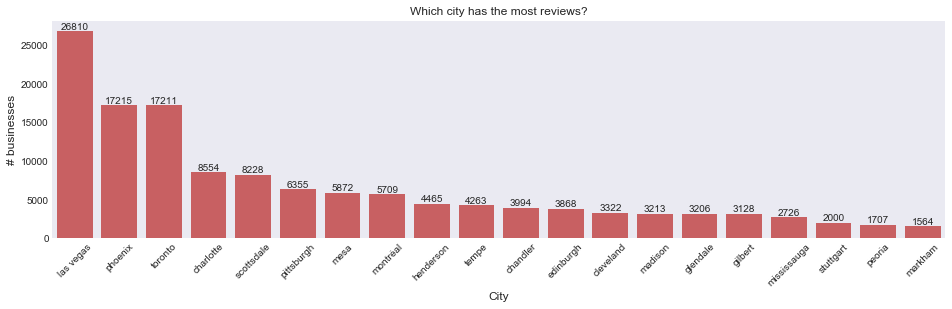

In [14]:
#Get the distribution of the ratings
x=business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[3])
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

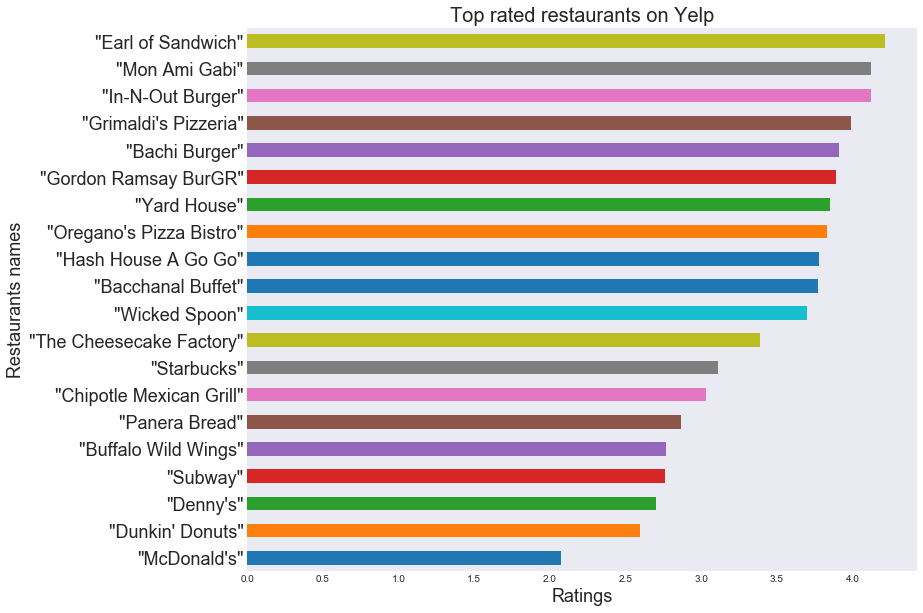

In [15]:
# df_yelp_review dataset has business id but don't have businesss name.
# But df_yelp_business_restaurants have business name and business id.
# So I take the df_yelp_review business_id and match with df_yelp_business_restaurants business id.
# And take the business name from df_yelp_business_restaurants and create a new column in df_yelp_review that holds business name
reviews['name'] = reviews['business_id'].map(business.set_index('business_id')['name'])
# take the top only 20 most occurances restaurants for analysis. Because the dataset has over thousand business id. It will be really inefficient if we take all of the business name
top_restaurants = reviews.name.value_counts().index[:20].tolist()
# create a new dataframe called 'df_review_top' that only contains the reviews of 'top_restaurants'
df_review_top = reviews.loc[reviews['name'].isin(top_restaurants)]
# now we take the name column and count mean of stars of each unique business name (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then sort values in ascending order 

# then plot the graph
a=df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=True)
a.plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top rated restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

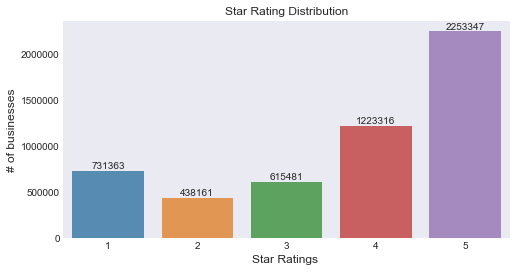

In [16]:
#Get the distribution of the ratingsfor yelp_review
x=reviews['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [17]:
user_agg=reviews.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [18]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id        date             useful  funny   cool  \
                           count         min         max    sum    sum    sum   
user_id                                                                         
CxDOIDnH8gp9KXzpBHJYXw      3569  2009-11-09  2017-12-05  11345   5546   6695   
bLbSNkLggFnqwNNzzq-Ijw      2077  2012-05-20  2017-12-11  23572  12630  16303   
PKEzKWv_FktMm2mGPjwd0Q      1611  2008-12-12  2017-12-05  12078   4987   8183   
DK57YibC5ShBmqQl97CKog      1463  2006-02-12  2017-12-10  13175   6693  10795   
QJI9OSEn6ujRCtrX06vs1w      1322  2007-03-20  2016-05-01   8748   4104   6142   
d_TBs6J3twMy9GChqUEXkg      1184  2010-12-27  2017-11-23   2992   1341   1792   
ELcQDlf69kb-ihJfxZyL0A      1159  2011-04-10  2017-12-10   2155   1298   1029   
cMEtAiW60I5wE_vLfTxoJQ      1126  2009-06-12  2017-12-07   1943   1213   1509   
hWDybu_KvYLSdEFzGrniTw      1117  2009-03-08  2017-11-26   7234   4968   5762   
U4INQZOPSUaj8hMjLlZ3KA      1101  2008-05-13  2017-12-11   6116   2832   4187   

                           stars  
                            mean  
user_id                           
CxDOIDnH8gp9KXzpBHJYXw  3.201737  
bLbSNkLggFnqwNNzzq-Ijw  3.256139  
PKEzKWv_FktMm2mGPjwd0Q  3.664804  
DK57YibC5ShBmqQl97CKog  3.826384  
QJI9OSEn6ujRCtrX06vs1w  3.622542  
d_TBs6J3twMy9GChqUEXkg  3.463682  
ELcQDlf69kb-ihJfxZyL0A  2.993097  
cMEtAiW60I5wE_vLfTxoJQ  4.066607  
hWDybu_KvYLSdEFzGrniTw  3.640107  
U4INQZOPSUaj8hMjLlZ3KA  3.714805

Number of city listed 1040


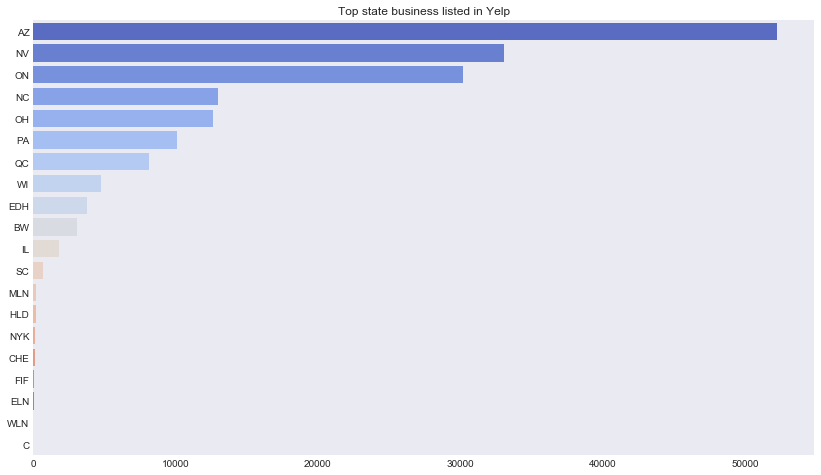

In [19]:
print('Number of city listed',business['city'].nunique())
f,ax = plt.subplots(1,1, figsize=(14,8))
#ax1,ax2, = ax.flatten()
cnt = business['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax =ax)
ax.set_xlabel('')
ax.set_title('Top state business listed in Yelp');

Maximum number of category 36
Median category of business 3.0


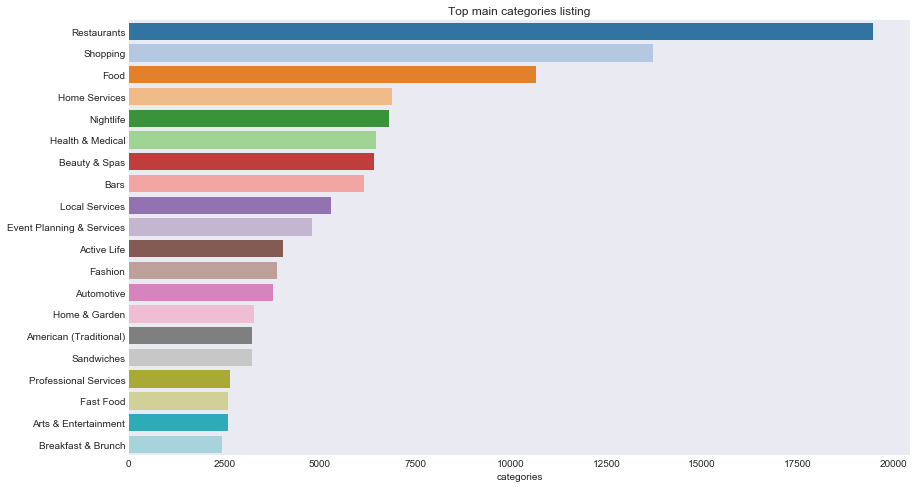

In [20]:
#We find,there are 1093 city listed in yelp.com
#city Las Vegas is top list in business listing in Yelp.com followed by Phoniex,Toronto etc..
#thier are 67 state listed in yelp.com
#state AZ is top in the list of Yelp.com
#There are few states having very few business listing

print('Maximum number of category',business['categories'].str.split(';').str.len().max())
print('Median category of business',business['categories'].str.split(';').str.len().median())
corpus = ' '.join(business['categories'])

corpus = pd.DataFrame(corpus.split(';'),columns=['categories'])
cnt = corpus['categories'].value_counts().to_frame()[:20]
plt.figure(figsize=(14,8))
sns.barplot(cnt['categories'], cnt.index, palette = 'tab20')
plt.title('Top main categories listing');

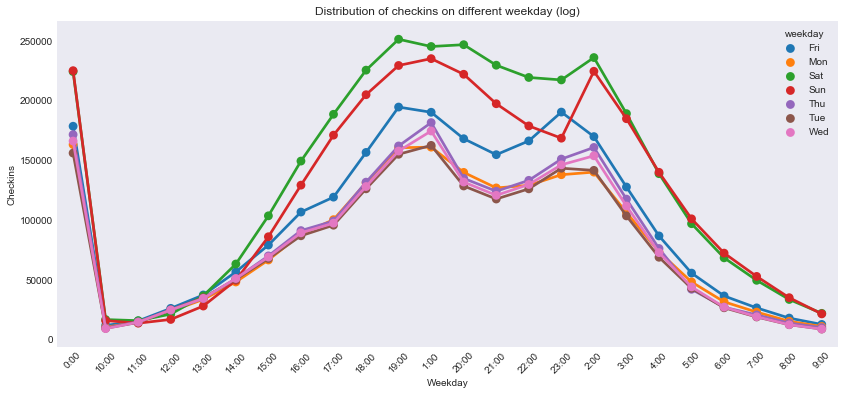

In [21]:
#timing when people visit the places:
k = checking.groupby(['weekday','hour',])['checkins'].sum().to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.pointplot(y = k['checkins'],x = k['hour'],hue = k['weekday'],alpha=0.3)
plt.ylabel('Checkins')
plt.title('Distribution of checkins on different weekday (log)')
plt.xlabel('Weekday')
plt.xticks(rotation=45);

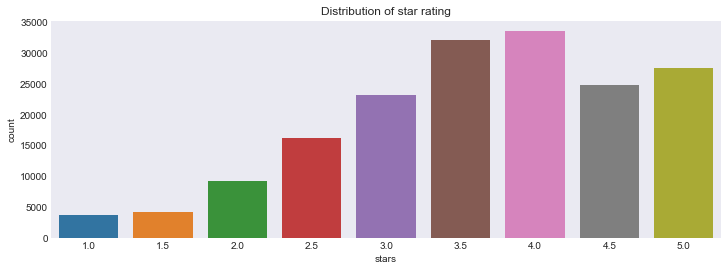

In [22]:
plt.figure(figsize=(12,4))
ax = sns.countplot(business['stars'])
plt.title('Distribution of star rating');

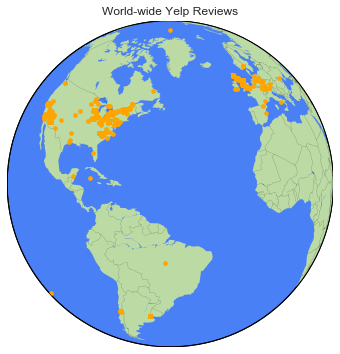

In [25]:
#basic basemap of the world
plt.figure(1, figsize=(15,6))
# use ortho projection for the globe type version
m1=Basemap(projection='ortho',lat_0=20,lon_0=-50)

# hex codes from google maps color pallete = http://www.color-hex.com/color-palette/9261
#add continents
m1.fillcontinents(color='#bbdaa4',lake_color='#4a80f5') 
# add the oceans
m1.drawmapboundary(fill_color='#4a80f5')                
# Draw the boundaries of the countires
m1.drawcountries(linewidth=0.1, color="black")

#Add the scatter points to indicate the locations of the businesses
mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="orange", lw=3, alpha=1, zorder=5)
plt.title("World-wide Yelp Reviews")
plt.show()